# 最急降下法を理解しよう

最急降下法は，次章のニューラルネットワークの学習でも用いる手法となるので，ここで最急降下法の原理を学ぶ．

## 1. 最急降下法とは

機械学習では，データが生成されるメカニズムをなんらかの数理モデルに当てはめる．  
このとき，目的関数を設定し，この目的関数を最小（あるいは最大）にするパラメータを求めることがよくある．  
目的関数が解析に解けるときは良いが，陽に解けない場合，その解の近似値をなんらかの方法で求める必要がある．  
このときに用いる手法が最急降下法である．  
最急降下法は，Deep Learningの学習にも使われており，機械学習では基本の技術となっている．  
最急降下法の式を以下に示す．  

$$
x_{t+1} = x_{t} - \eta \frac{\partial f(x_{t})}{\partial x_{t}}
$$

この式の意味は，現在の値$x_{t}$に，そのときの関数の傾き$\frac{\partial f(x_{t})}{\partial x_{t}}$を$\eta$倍した値を引いて，次の値$x_{t+1}$を求めるというものである．  
$\eta$は学習係数と呼ばれ，修正量を調節するパラメータである．  
これを繰り返して，極小値を求める手法である．  
最急降下法のイメージを以下の図に示す．

<img src="img/gdm1.png" width="400">
<div style="text-align: center;">
図1.  最急降下法のイメージ
</div>

<img src="img/gdm2.png" width="400">
<div style="text-align: center;">
図2.  修正を繰り返して極小値を求めていく様子
</div>

最急降下法の特徴として，傾きが大きいときは，修正量も大きくなるため極小値に一気に近づく．  
一方，関数の傾きが小さいと，修正量が小さくなる．  
つまり，最急降下法は極小値に近づけば近づくほど，修正量が小さくなり，なかなか近づかなくなる．  
理論的には，無限回繰り返して，最小値になる．  
しかし，無限回繰り返すことはできないため，近似値を求めて終了する．  
近似値の精度の決め方は，一般的には今回と次回の差がある値より小さくなったら，もう修正されなくなったと判断して，繰り返しを打ち切る．  
具体的には，
$$
|x_{t+1}-x_{t}|<EPS
$$
とする．  
EPSは事前に決めておく精度パラメータである．  

<img src="img/gdm3.png" width="400">
<div style="text-align: center;">
図3.  傾きによる修正量の違い
</div>

修正する方向は関数の傾きから決定される．  
傾きが正のときは引き算されるので，現在値から見て左側に修正される．  
一方，傾きが負のときは足し算になるので，現在値から見て右側に修正されることになる．

<img src="img/gdm4.png" width="400">
<div style="text-align: center;">
図4.  修正される方向
</div>

修正量が大きすぎると発散する．  
以下の関数$f(x)=x^2$の場合，現在の値が極小値をとる$x=0$の対象点よりも大きく修正されると，次の修正ではさらに修正量が大きくなるため発散する．  
このような問題を解決するために，学習係数$\eta$を小さい値（例えば，0.001など）に設定して回避する．  
当然，学習係数$\eta$を小さくすれば，一回の修正量が小さくなるため，収束するまでに時間がかかる．  
しかし，発散するよりは，計算機のパワーで何回も小さく修正して収束するほうが良い結果となることが多い．  

近年，この学習係数$\eta$を適切に決定する手法が多く提案されている．  
深層学習ではAdam(Adaptive moment estimation)と呼ばれる手法が用いられることがある．  

参考文献:[An overview of gradient descent optimization algorithms](https://ruder.io/optimizing-gradient-descent/)

<img src="img/gdm5.png" width="400">
<div style="text-align: center;">
図5.  最急降下法で発散する様子
</div>

### 弱点
最急降下法は傾きを使って修正する方法であるため極小値しか求めることができない．  
初期値によって求まる極小値は変わる．  
最小値を求めたい場合，関数の形状を把握した上で初期値を決定しないといけない（基本的には無理．多変数関数の形状はわからないから．）

その対策としてディープラーニングでは確率的勾配降下法と呼ばれる手法を用いている．  
ディープラーニングでは，トレーニングデータから修正量を求めて学習を行う．  
ここでは簡単に説明するが， 一度にすべてのデータによって修正量を求めるのではなく，いくつかのデータで修正量を求めて少しずつ修正する方法である．  

### メリット
微分できれば，多変数関数でも使える．  
つまり，現在点よりも必ず良いパラメータが求まる．  

例えば，AI将棋の先駆けとなったBonanzaでは評価関数の最適化のために確率的勾配降下法を用いている．

参考文献:[Bonanza#数式](https://ja.wikipedia.org/wiki/Bonanza#%E6%95%B0%E5%BC%8F)

<img src="img/gdm6.png" width="400">
<div style="text-align: center;">
図6.  最急降下法のイメージ
</div>

## 2. 最急降下法を1変数関数に適用する

目的関数

$$
f(x) = x^4-8x^3+18x^2-3x+1
$$

この関数の最小値を求めたい．

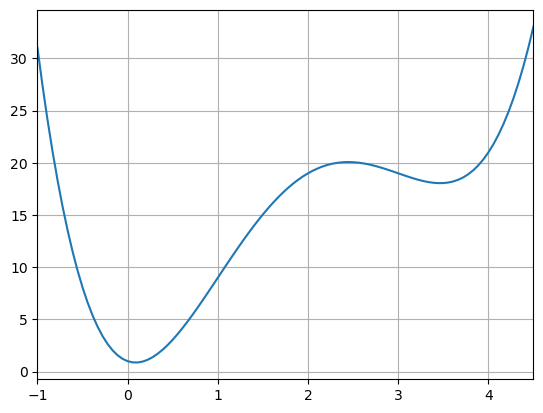

In [3]:
import numpy as np

#
# 目的関数を設定（この関数の最小値を求めたい．）
#
def mathfunc(x):
    y = x**4 - 8*x**3 + 18*x**2 - 3*x  + 1
    return y

#
# 作成した関数のグラフを表示する
#
import matplotlib.pyplot as plt

# グラフ描画のためのデータ作成
xmin = -1.0
xmax = 4.5
num = 100
x = np.linspace(xmin, xmax, num)
y = mathfunc(x)

# グラフ描画
plt.plot(x, y)
plt.xlim(xmin, xmax)
plt.grid(True)
plt.show()

### この目的関数の最小値を最急降下法で求める
目的関数を微分する．  
これは人間が解く必要がある．  
(ただし，微分の定義から計算で求める方法もあるがここでは紹介しない． 
参考文献:[前進差分近似と中心差分近似の誤差](https://mochablog.org/diff-forward-central/))

近年は，数式を計算してくれるツールが多く存在する．  
例えば，[Wolfram](https://www.wolframalpha.com/)を使えば，グラフの表示だけでなく，微分もしてくれる．


$$
 f(x)=x^4 - 8x^3 + 18x^2 - 3x - 11\\
 f'(x) = 4x^3-24x^2+36x-3
$$

In [4]:
# 初期値
a = 2.0

# 学習係数
eta = 0.01

# 目的関数の微分
def ｄerivative(x):
    y = 4*x**3 - 24*x**2 + 36*x-3
    return y

for i in range(10):
    print(a)

    # 更新式
    a = a - eta*derivative(a)
    

2.0
1.95
1.894005
1.8313332338987178
1.7612851544778672
1.6831834975092712
1.596437506273249
1.5006390178994629
1.3956965540006094
1.2820073859504062


初期値2\.0で初めて，徐々に最小値をとるｘに近づいている．  
これをグラフ表示する．

更新回数= 26
a= 0.08866251044482384


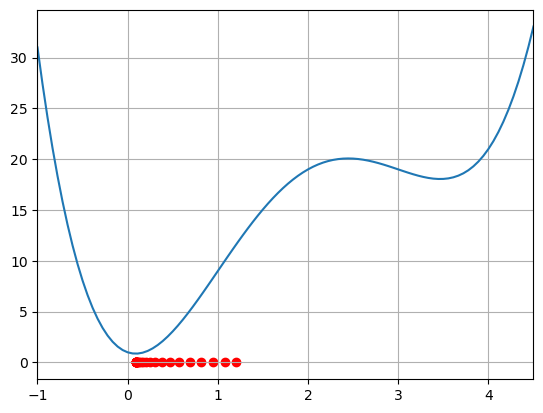

In [7]:
import numpy as np

#
# 目的関数を設定（この関数の最小値を求めたい．）
#
def mathfunc(x):
    y = x**4 - 8*x**3 + 18*x**2 - 3*x +1
    return y

# 最急降下法で目的関数の最小値をとるパラメータを求める．

# 初期値
a = 1.2

# 学習係数
eta = 0.01

# 目的関数の微分
def ｄerivative(x):
    y = 4*x**3 - 24*x**2 + 36*x-3
    return y

para_x = []
para_y =[]

# 終了条件
epsilon = 0.0001
old_para = a

ct = 0
for i in range(1000):
    para_x.append(a)
    para_y.append(0)
    # 更新式
    a = a - eta*derivative(a)
    if abs(old_para-a)<epsilon:
        break
    old_para = a
    ct+=1

# 更新回数
print('更新回数=', ct)

# 求めたパラメータ
print('a=', a)

#
# 最急降下法の様子をグラフを表示する
#
import matplotlib.pyplot as plt

# グラフ描画のためのデータ作成
xmin = -1.0
xmax = 4.5
num = 100
x = np.linspace(xmin, xmax, num)
y = mathfunc(x)

# グラフ描画
plt.plot(x, y)
plt.scatter(para_x, para_y, color='red')
plt.xlim(xmin, xmax)
plt.grid(True)
plt.show()

初期値を変更すると，求まる解が異なることがわかる．  
また，一般的に終了条件は，回数ではなく，前回と今回の差が一定よりも小さくなったら終了する．  
つまり，更新しても，パラメータが変更されなくなったら終了する．  

## 演習

- 初期値a = -0.5を変更してみる．
- 初期値a = 2.5を変更してみる．
- 初期値a = 2.4を変更してみる．
- 学習係数eta = 0.0001を変更してみる．
- 終了条件epsilon = 0.00001を変更してみる．

## 最急降下法を多変数関数に適用する
目的関数が微分できれば，多変数関数でも極小値を求めることができる

目的関数

$$
 f\left(x,y\right)=\sin{(x)}+2x\cos{(y)}+0.2x^2+0.2y^2
$$

の最小値を求めたい．

表示すると，次のような複雑な局面を持つ2変数関数です．

![title](./img/sincos.png)

多変数関数でも，偏微分できれば最急降下法が使えます．


目的関数

$$
 f\left(x,y\right)=\sin{(x)}+2x\cos{(y)}+0.2x^2+0.2y^2
$$

偏微分
$$
\begin{align}
\frac{\partial f(x,y)}{\partial x} &=\cos{(x)}+2\cos{(y)}+0.4x\\
\frac{\partial f(x,y)}{\partial y} &=-2x\sin{(y)}+0.4y
\end{align}
$$

In [8]:
# 複雑な3次元データの最小値を求める．

import numpy as np

#
# 目的関数を設定（この関数の最小値を求めたい．）
#
def mathfunc(a, b):
    y = np.sin(a)+2*a*np.cos(b)+0.2*a**2+0.2*b**2
    return y

# 最急降下法で目的関数の最小値をとるパラメータを求める．

# 初期値
a = 5.8
b = 6.2
c = mathfunc(a, b)

# 学習係数
eta = 0.01

# 目的関数の偏微分:x
def ｄerivative_x(a, b):
    y = np.cos(a)+2.0*np.cos(b)+0.4*a
    return y

# 目的関数の偏微分:y
def ｄerivative_y(a,b):
    y = -2*np.sin(b)+0.4*b
    return y

para_a = []
para_b =[]
para_c =[]

# 終了条件
epsilon = 0.0001
old_para_a = a
old_para_b = b

ct = 0
for i in range(1000):
    para_a.append(a)
    para_b.append(b)
    para_c.append(c)

    # 更新式
    a = a - eta*derivative_x(a, b)
    b = b - eta*derivative_y(a, b)
    c = mathfunc(a, b)
    
    if abs(old_para_a-a)<epsilon and abs(old_para_b-b)<epsilon:
        break
    old_para_a = a
    old_para_b = b
    
    ct+=1

# 更新回数
print('更新回数=', ct)

# 求めたパラメータ
print('a=', a)
print('b=', b)

#
# 最急降下法の様子をグラフを表示する
# （ここでは3次元グラフ）
#

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10.0, 10.0, 1)
y = np.arange(-10.0, 10.0, 1)
X, Y = np.meshgrid(x, y)
Z = mathfunc(X, Y)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X, Y, Z)
ax.plot(para_a, para_b, para_c,marker="o",linestyle='None', color='red')
plt.show()

更新回数= 370
a= 4.595030118372948
b= 2.597369782205833


<Figure size 640x480 with 0 Axes>

更新の様子を別の角度から見たものを下図に示す．
<img src="img/gdm7.png" width="400">
<div style="text-align: center;">
図7.  多変数関数の最急降下法の様子
</div>

## 最急降下法の欠点
- 最急降下法は最小値ではなく，極小値を求めることしかできない．  
- 結果が初期値に依存する
- 学習係数のパラメータの設定を行う必要がある．

[講義資料に戻る](https://github.com/crotsu/Deep_Learning_Starting_with_Examples)

このページは[このリンク](https://colab.research.google.com/github/crotsu/Deep_Learning_Starting_with_Examples/blob/main/chap3_gdm/chap3_gdm.ipynb)
よりgoogle colaboratoryで動作させることができる．  